

# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## <a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


>**Column names :**
id/imdb_id/popularity/budget/revenue/original_title/cast/homepage/director/tagline/keywords/overview/runtime/genres/
production_companies/release_date/vote_count/vote_average/release_year/budget_adj/revenue_adj
. 


### Question(s) for Analysis(I'll be analysing the first 2 questions )
>**Amount of production of movies from each genre?**

>**Do the most popular movies get high rating?**

>**profitability of each genre?**

>**How are revenues trending over time?**

>**How is runtime trending over time?**

>**Do top ratings movies always generate big revenue?**

>**Do higher budget movies always generate big revenue?**


here i'm importing the libraries that i will use in the project

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [41]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

The first step , I'll read the data and make a data frame 

Then i'll look at the first 5 rows of the data to inspect it

After that i'll try to get some info and sescription from the data

And next i'll start cleaning the data and remove the null values

and see if there is any columns that we won't need in our analysis 

and remove them. also i'll be using methods to split the genres and 

production_companies columns as it will help in the analysis



In [42]:
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [43]:
df.shape

(10866, 21)

In [44]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Data Cleaning 

 I will be removing some columns that will not help me in the analysis of my quiestions
(id/imdb_id/homepage/tagline/keywords/overview/budget_adj/revenue_adj)

In [46]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj'], axis=1 , inplace=True )

In [47]:
df.head(20)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


i will be ploting histograms for all the data frame to give me a quick idea of how the data looks

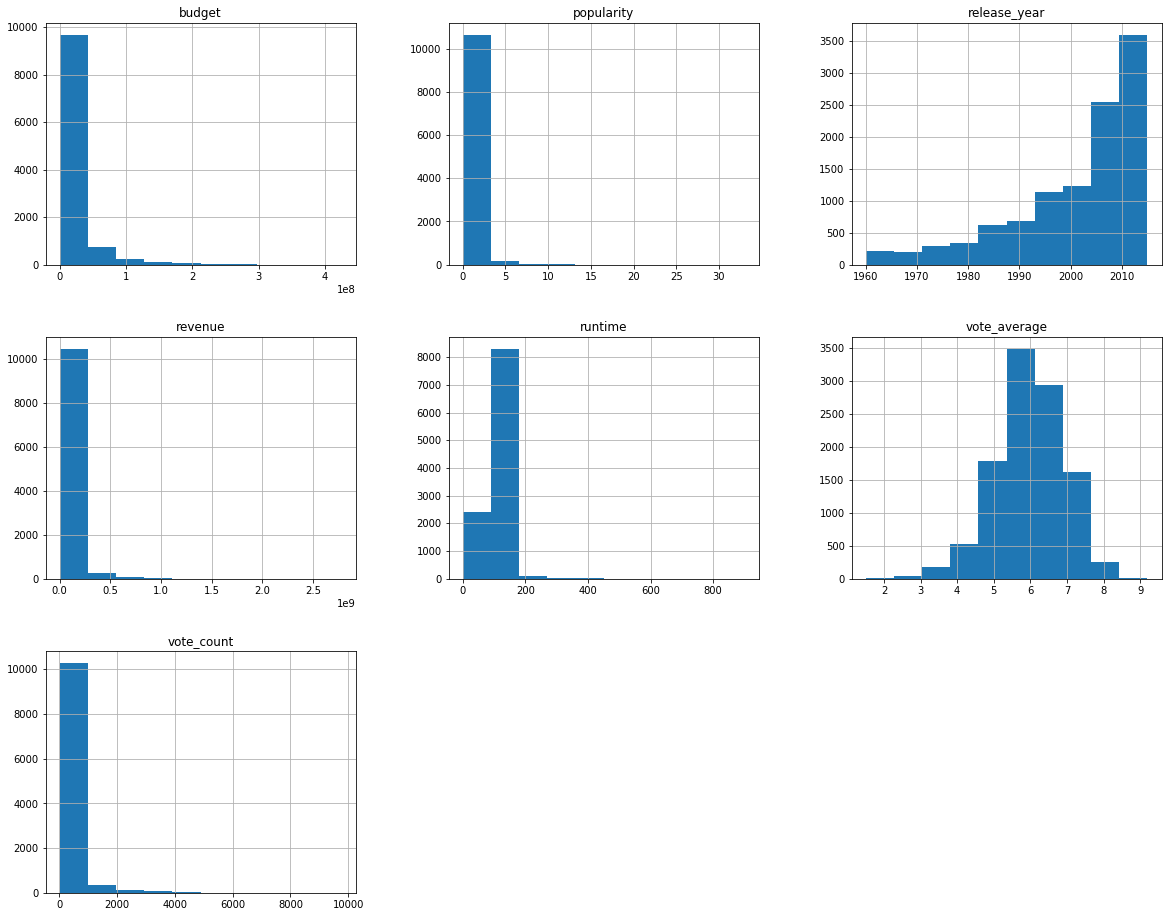

In [49]:
df.hist(figsize=(20,16));

#### I dont think production_companies column will help a lot in our analysis so i'll drop all null values

In [50]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 13 columns):
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB


In [51]:
df.duplicated().sum()

1

Only one duplicate will not affect the analysis

#### This method will help in splitting the companies that produced each film and count them

In [52]:
def splitting(x):
    companies_split = df[x].str.cat(sep = '|')
    single = pd.Series(companies_split.split('|'))
    info = single.value_counts(ascending=False)
    return info

In [53]:
print(splitting('production_companies'))

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
                                         ... 
Bachelor Party Productions                  1
Italo/Judeo Productions                     1
Rafran Cinematografica                      1
SVT Drama                                   1
Windy Hill Pictures                         1
Length: 7842, dtype: int64


## Q1) Amount of production of movies from each genre?
this will help in knowing the amount of competition in each genre 

In [54]:
df['genres'].value_counts()

Drama                              638
Comedy                             615
Drama|Romance                      272
Comedy|Drama                       255
Comedy|Romance                     248
                                  ... 
Romance|Drama|Crime                  1
TV Movie|Drama|Family                1
Mystery|Science Fiction|Romance      1
Comedy|Family|Romance|Fantasy        1
Horror|Science Fiction|Crime         1
Name: genres, Length: 1916, dtype: int64

In [55]:
genres_df=df.genres.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

In [56]:
genre_total=genres_df.sum(axis = 0)

In [57]:
genre_total

Adventure          1384.0
Science Fiction    1137.0
Thriller           2747.0
Action             2236.0
Fantasy             840.0
Crime              1300.0
Drama              4365.0
Western             160.0
Family             1095.0
Comedy             3433.0
Animation           617.0
Mystery             773.0
Romance            1570.0
War                 258.0
History             306.0
Music               339.0
Horror             1526.0
Documentary         317.0
TV Movie            132.0
Foreign             120.0
dtype: float64

In [58]:
genre_total.describe()

count      20.000000
mean     1232.750000
std      1169.764838
min       120.000000
25%       314.250000
50%       967.500000
75%      1537.000000
max      4365.000000
dtype: float64

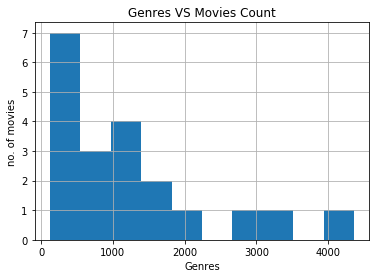

In [59]:
genre_total.hist()
plt.title('Genres VS Movies Count')
plt.xlabel('Genres')
plt.ylabel('no. of movies');

In [60]:
genre_total=genre_total.sort_values()


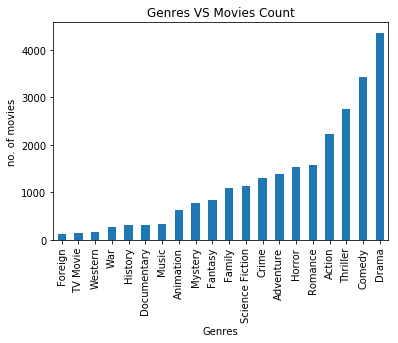

In [62]:
genre_total.plot(kind="bar")
plt.title('Genres VS Movies Count')
plt.xlabel('Genres')
plt.ylabel('no. of movies');

we can find that drama , comedy , thriller and action films are the most produced types of moveis

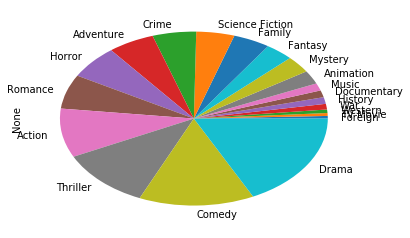

In [63]:
genre_total.plot(kind="pie");

## **Q2) Do the most popular movies get high rating?**

In [64]:
popular = df.query('popularity >= {}'.format(df['popularity'].median()))
not_popular =df.query('popularity < {}'.format(df['popularity'].median()))

In [65]:
mean_popular=popular['vote_count'].mean()
mean_not_popular=not_popular['vote_count'].mean()

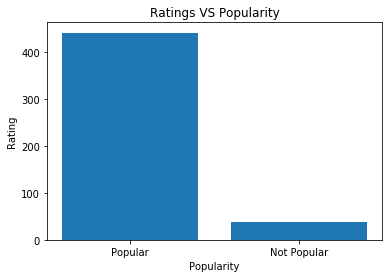

In [66]:
plt.bar([1, 2], [mean_popular, mean_not_popular], tick_label=['Popular', 'Not Popular'])
plt.title('Ratings VS Popularity')
plt.xlabel('Popularity')
plt.ylabel('Rating');

we can find that the more popular movies tends to have better ratings 

<a id='conclusions'></a>
## Conclusions

●in conclusion I have found that drama , comedy , thriller and action films are the most produced types of moveis this means that the compettition is very high.

●Also i have found that the more popular movies tends to have better ratings 

●by combining those info together we can conclude that the popular movies are not over rated but they are popular because people liked it 

### Limitations
●some of the values were null in the data so i had to remove it which changed the analysis a little bit but the over all analysis is the same 

●Also this data is from many years so we can't gurantee that this conclusions are valid now 

●Moreover we are not sure that the data are fully correct and trustfull


In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0